# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [176]:
df_raw = pd.read_csv("admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [177]:
# frequency table for prestige and whether or not someone was admitted
print df.groupby(by = ['prestige', 'admit']).size()

prestige  admit
1.0       0        28
          1        33
2.0       0        95
          1        53
3.0       0        93
          1        28
4.0       0        55
          1        12
dtype: int64


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [178]:
dummy_ranks=pd.get_dummies(df['prestige'], prefix = 'prestige')
#dummy column names were a float so I wanted to get rid of the '.0', is there an easier way to do that than 
#renaming all the columns?
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


#### 2.2 When modeling our class variables, how many do we need? 



Answer: 3, the fourth variable can be implied and acts as the control

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [179]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61         0.0         0.0         1.0         0.0
1      1  660.0  3.67         0.0         0.0         1.0         0.0
2      1  800.0  4.00         1.0         0.0         0.0         0.0
3      1  640.0  3.19         0.0         0.0         0.0         1.0
4      0  520.0  2.93         0.0         0.0         0.0         1.0


In [180]:
#crosstab prestige 1 admission 
#frequency table cutting prestige and whether or not someone was admitted
print pd.crosstab(index = df.prestige, columns = df.admit, margins = True)

admit       0    1  All
prestige               
1.0        28   33   61
2.0        95   53  148
3.0        93   28  121
4.0        55   12   67
All       271  126  397


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [181]:
33./28

1.1785714285714286

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [182]:
(126.-33)/(271.-28)

0.38271604938271603

#### 3.3 Calculate the odds ratio

In [183]:
1.1786/0.3827

3.079696890514764

#### 3.4 Write this finding in a sentenance: 

Answer: The odds of being admitted having attended a rank 1 undergraduate university is approximately 3:1 compared to the odds of not having attended a rank 1 university.

#### 3.5 Print the cross tab for prestige_4

In [184]:
print pd.crosstab(index = df.prestige, columns = df.admit, margins = True).iloc[3:4, :]

admit      0   1  All
prestige             
4.0       55  12   67


#### 3.6 Calculate the OR 

In [185]:
(12./55) / ((126.-12)/(271.-55))

0.4133971291866028

#### 3.7 Write this finding in a sentence

Answer: The odds of being admitted having attended a rank 4 undergraduate university is approximately 0.4:1 compared to the odds of not having attended a rank 4 university.

## Part 4. Analysis

In [186]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61         0.0         1.0         0.0
1      1  660.0  3.67         0.0         1.0         0.0
2      1  800.0  4.00         0.0         0.0         0.0
3      1  640.0  3.19         0.0         0.0         1.0
4      0  520.0  2.93         0.0         0.0         1.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [187]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [188]:
train_cols = data.columns[1:]

#### 4.2 Fit the model

In [189]:
y = data['admit']
x = data[train_cols]
logit = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [190]:
print(logit.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sun, 23 Oct 2016   Pseudo R-squ.:                 0.08166
Time:                        14:05:11   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa            0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2    -0.6801      0.317     -2.146      0.0

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [191]:
np.exp(logit.params)

gre           1.002221
gpa           2.180027
prestige_2    0.506548
prestige_3    0.262192
prestige_4    0.211525
intercept     0.020716
dtype: float64

In [196]:
np.exp(logit.conf_int())

,0,1
gre,1.000074,1.004372
gpa,1.136120,4.183113
prestige_2,0.272168,0.942767
prestige_3,0.133377,0.515419
prestige_4,0.093329,0.479411
intercept,0.002207,0.194440


#### 4.5 Interpret the OR of Prestige_2

Answer: The odds of being admitted if the applicant's undergraduate school was in rank/prestige 2 decreases to about 0.51.

#### 4.6 Interpret the OR of GPA

Answer: The odds of being admitted with every 1 point increase in GPA is about doubled (2.18x).

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [197]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [198]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4]]))
print combos.head()


[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]
       0         1    2
0  220.0  2.260000  1.0
1  220.0  2.260000  2.0
2  220.0  2.260000  3.0
3  220.0  2.260000  4.0
4  220.0  2.453333  1.0


#### 5.1 Recreate the dummy variables

In [199]:
# recreate the dummy variables
dummies = pd.get_dummies(combos[2], prefix = "prestige")

# keep only what we need for making predictions
combos = combos.join(dummies)
combos.columns = ['gre', 'gpa', 'prestige', 'prestige1', 'prestige2', 'prestige3', 'prestige4']
combos['intercept'] = 1.
combos.head()

,gre,gpa,prestige,prestige1,prestige2,prestige3,prestige4,intercept
0,220.0,2.260000,1.0,1.0,0.0,0.0,0.0,1.0
1,220.0,2.260000,2.0,0.0,1.0,0.0,0.0,1.0
2,220.0,2.260000,3.0,0.0,0.0,1.0,0.0,1.0
3,220.0,2.260000,4.0,0.0,0.0,0.0,1.0,1.0
4,220.0,2.453333,1.0,1.0,0.0,0.0,0.0,1.0


#### 5.2 Make predictions on the enumerated dataset

In [200]:
train_cols = combos[['gre', 'gpa', 'prestige2', 'prestige3', 'prestige4', 'intercept']]
combos['predict'] = logit.predict(train_cols)
combos.tail(4)

,gre,gpa,prestige,prestige1,prestige2,prestige3,prestige4,intercept,predict
396,800.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.734040
397,800.0,4.0,2.0,0.0,1.0,0.0,0.0,1.0,0.582995
398,800.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,0.419833
399,800.0,4.0,4.0,0.0,0.0,0.0,1.0,1.0,0.368608


#### 5.3 Interpret findings for the last 4 observations

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

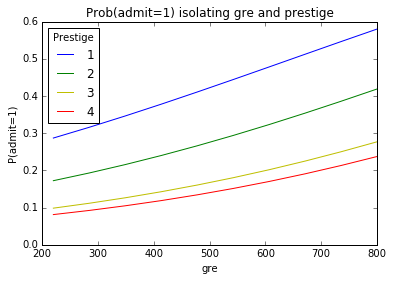

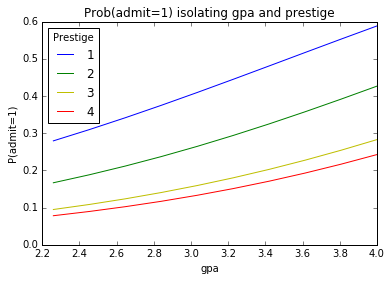

In [201]:
#yes this is from yhat...

def isolate_and_plot(variable):
    grouped = pd.pivot_table(combos, values=['predict'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['predict'],
            color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and prestige")
    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')